As the title suggests, this notebook is an end-to-end example of solving a real-world problem using Data Science. We’ll be using Machine Learning to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc. The notebook intends to walk through the various stages of the data science workflow. In particular, the notebook has the following sections

    Overview
    Data Description
    Data Exploration
    Data Preparation
    Training and Evaluating the Machine Learning Model
    Hyper-parameter Tuning(GridSearch CV)
    Saving the Model
    Making Predictions with the Model

## **OVERVIEW**:

    The data was collected and made available by “National Institute of
    Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians
    Diabetes Database.  In particular, all patients here belong to the Pima
    Indian heritage (subgroup of Native Americans), and are females of ages 21
    and above.

    We’ll be using Python and some of its popular data science related
    packages. First of all, we will import pandas to read our data from a CSV
    file and manipulate it for further use. We will also use numpy to convert
    out data into a format suitable to feed our classification model. We’ll use
    seaborn and matplotlib for visualizations. We will then import Logistic
    Regression,xgboost & adaboost algorithm from sklearn. These algorithm will
    help us build our classification model and we would choose the best amongst
    the three. We would also use hyperparameter tuning 
    cv to fine tune our models.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# **DATA DESCRIPTION**:

The following features have been provided to help us predict whether a person is diabetic or not:

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)2)
    DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
    Age: Age (years)
    Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [ ]:
pima = pd.read_csv('/content/pima-indians-diabetes.csv', header=None)

In [ ]:
pima.columns = ['pregnancies','glucose','blood_pressure','skin_thickness','insulin','bmi','diabetics_pedigree','age','outcome']
pima.head(5)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetics_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **DATA EXPLORATION**

In [ ]:
print(pima.isnull().sum())

pregnancies           0
glucose               0
blood_pressure        0
skin_thickness        0
insulin               0
bmi                   0
diabetics_pedigree    0
age                   0
outcome               0
dtype: int64


In [ ]:
#pima.drop(labels='pregnancies',axis=1,inplace=True)

In [ ]:
pima

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetics_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pregnancies         768 non-null    int64  
 1   glucose             768 non-null    float64
 2   blood_pressure      768 non-null    float64
 3   skin_thickness      768 non-null    float64
 4   insulin             768 non-null    float64
 5   bmi                 768 non-null    float64
 6   diabetics_pedigree  768 non-null    float64
 7   age                 768 non-null    int64  
 8   outcome             768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
pima.corr()*100

,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetics_pedigree,age,outcome
glucose,100.000000,15.827930,7.493412,33.118988,23.514666,13.710636,26.659989,49.290843
blood_pressure,15.827930,100.000000,20.737054,8.893338,28.180529,4.126495,23.952795,6.506836
skin_thickness,7.493412,20.737054,100.000000,43.678257,39.257320,18.392757,-11.397026,7.475223
insulin,33.118988,8.893338,43.678257,100.000000,19.785906,18.507093,-4.216295,13.054795
bmi,23.514666,28.180529,39.257320,19.785906,100.000000,14.064695,3.624187,29.269466
diabetics_pedigree,13.710636,4.126495,18.392757,18.507093,14.064695,100.000000,3.356131,17.384407
age,26.659989,23.952795,-11.397026,-4.216295,3.624187,3.356131,100.000000,23.835598
outcome,49.290843,6.506836,7.475223,13.054795,29.269466,17.384407,23.835598,100.000000


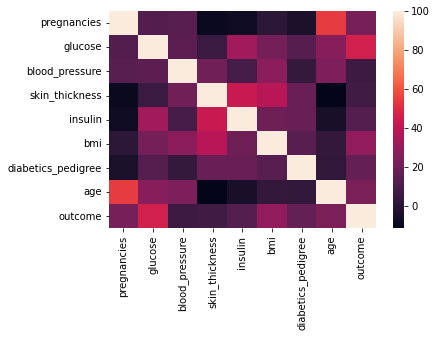

In [ ]:
sns.heatmap(pima.corr()*100)

In [ ]:
pima.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetics_pedigree,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


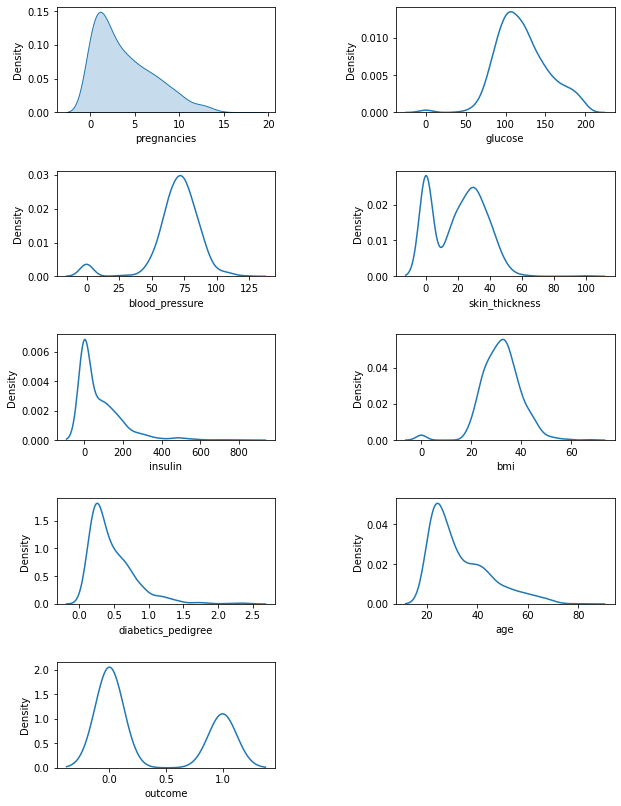

In [ ]:
plt.figure(figsize=(10,14))
plt.subplots_adjust(wspace=.55,hspace= .55) #wspace= Horizontal spacing of the plot #hspace= Vertical spacing
plt.subplot(5,2,1)
sns.kdeplot(data=pima.pregnancies , shade =True)
plt.subplot(5,2,2)
sns.kdeplot(data=pima.glucose)
plt.subplot(5,2,3)
sns.kdeplot(data=pima.blood_pressure)
plt.subplot(5,2,4)
sns.kdeplot(data=pima.skin_thickness)
plt.subplot(5,2,5)
sns.kdeplot(data=pima.insulin)
plt.subplot(5,2,6)
sns.kdeplot(data=pima.bmi)
plt.subplot(5,2,7)
sns.kdeplot(data=pima.diabetics_pedigree)
plt.subplot(5,2,8)
sns.kdeplot(data=pima.age)
plt.subplot(5,2,9)
sns.kdeplot(data=pima.outcome)



Data is imbalanced , we will try to balance it out in the next section


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


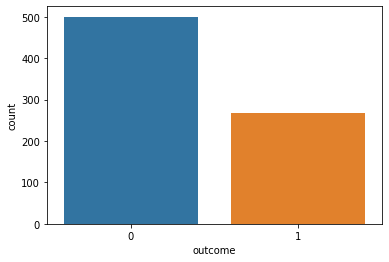

In [ ]:
sns.countplot(pima.outcome)
print('Data is imbalanced , we will try to balance it out in the next section')

## **DATA PREPARATION**

We can see that variables like glucose , blood_pressure, skin_thickness, insulin, bmi, diabetics_pedigree, age has 0 as values, we would be replacing those values with their respective means and medians for thosevariables that are not normally distributed

In [ ]:
pima.glucose.replace(0,value=pima.glucose.mean(),inplace=True)
pima.blood_pressure.replace(0,value=pima.blood_pressure.mean(),inplace=True)
pima.skin_thickness.replace(0,value=pima.skin_thickness.median(),inplace=True)
pima.insulin.replace(0,value=pima.insulin.median(),inplace=True)
pima.bmi.replace(0,value=pima.bmi.mean(),inplace=True)
pima.diabetics_pedigree.replace(0,value=pima.diabetics_pedigree.median(),inplace=True)
pima.age.replace(0,value=pima.age.median(),inplace=True)
pima

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetics_pedigree,age,outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


**Train Test split**

In [ ]:
X = pima.drop('outcome',axis=1)
y = pima.loc[:,['outcome']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(537, 8)
(537, 1)
(231, 8)
(231, 1)


**Balancing the data using SMOTE**

Since the data was unbalanced , i am going to do over sampling of minority class to balance it out with the majority class, for this purpose i am going to use SMOTE

SMOTE(Synthetic Minority OverSampling Technique) is a type of over sampling technique that generates synthetic samples that is similiar to the original sample. SMOTE uses k-nearest neighbour , by randomly picking up a point of minority class amd computes knn. The synthetic samples are then added between the chosen point and its neighbours.

Here we only would be resampling with train data as because resampling test data and having same number of both of the dependent variables do not makes much sense.


In [ ]:

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
print('Before Resampling''\n')
print(X_train.shape)
print(y_train.shape)
print('\n''After resampling''\n')
print(X_sm.shape)
print(y_sm.shape)
print('\n''outcome before resampling''\n')
print(y_train.value_counts())
print('\n''outcome after resampling''\n')
print(y_sm.value_counts())

Before Resampling

(537, 8)
(537, 1)

After resampling

(708, 8)
(708, 1)

outcome before resampling

outcome
0          354
1          183
dtype: int64

outcome after resampling

outcome
0          354
1          354
dtype: int64


**Normalize**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normie = MinMaxScaler()
X_scaled = normie.fit_transform(X_sm)
X_train = pd.DataFrame(X_scaled)
X_train.columns = ['pregnancies','glucose','blood_pressure','skin_thickness','insulin','bmi','diabetics_pedigree','age']
X_test_scaled= normie.transform(X_test)
X_test=pd.DataFrame(X_test_scaled)
X_test.columns = ['pregnancies','glucose','blood_pressure','skin_thickness','insulin','bmi','diabetics_pedigree','age']
X_train

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetics_pedigree,age
0,1.000000,0.597403,0.469388,0.271739,0.130316,0.386503,0.030303,0.431373
1,0.000000,0.344156,0.408163,0.315217,0.116598,0.380368,0.229501,0.078431
2,0.066667,0.467532,0.469388,0.228261,0.021262,0.188139,0.053030,0.000000
3,0.133333,0.402597,0.408163,0.304348,0.142661,0.251534,0.586007,0.254902
4,0.000000,0.512987,0.653061,0.326087,0.021262,0.347648,0.049911,0.156863
...,...,...,...,...,...,...,...,...
703,0.400000,0.762918,0.634080,0.173913,0.021262,0.256064,0.058702,0.509804
704,0.600000,0.305821,0.608065,0.260870,0.021262,0.343755,0.298569,0.666667
705,0.333333,0.530022,0.532292,0.173913,0.021262,0.351328,0.148906,0.313725
706,0.333333,0.915382,0.490434,0.282609,0.414606,0.281702,0.205895,0.313725


#**Training and Evaluating Machine Learning Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

**Logistic Regression**

In [ ]:
LR_dia = LogisticRegression()
LR_dia.fit(X_train,y_sm.values.ravel())
y_pred = LR_dia.predict(X_test)
LR_score = metrics.accuracy_score(y_test,y_pred)
LR_score

0.7922077922077922

**Random Forest**

In [ ]:
RF_dia = RandomForestClassifier(n_estimators=1000)
RF_dia.fit(X_train,y_sm.values.ravel())
RF_pred = RF_dia.predict(X_test)
RF_score = metrics.accuracy_score(y_test,RF_pred)
RF_score

0.8181818181818182

**Gradient Boosting Classifier**

In [ ]:
gbc_dia = GradientBoostingClassifier()
gbc_dia.fit(X_train,y_sm.values.ravel())
gbc_pred = gbc_dia.predict(X_test)
gbc_pred = metrics.accuracy_score(y_test,gbc_pred)
gbc_pred

0.8138528138528138

**Ada Boost Classifier**

In [ ]:
abc_dia = AdaBoostClassifier()
abc_dia.fit(X_train,y_sm.values.ravel())
abc_pred = abc_dia.predict(X_test)
abc_pred = metrics.accuracy_score(y_test,abc_pred)
abc_pred

0.7835497835497836

**K Fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)
LR_cv = cross_val_score(estimator=LR_dia , X=X_train, y=y_sm.values.ravel(), cv=k_fold)
#DT_cv = cross_val_score(estimator=DT , X=X_train, y=y_train.values.ravel(), cv=k_fold)
RF_cv = cross_val_score(estimator=RF_dia , X=X_train, y=y_sm.values.ravel(), cv=k_fold)
ABC_cv = cross_val_score(estimator=abc_dia , X=X_train, y=y_sm.values.ravel(), cv=k_fold)
GBC_cv = cross_val_score(estimator=gbc_dia , X=X_train, y=y_sm.values.ravel(), cv=k_fold)
print('KFOLD accuracy of LR:', LR_cv.mean())
#print('KFOLD accuracy of DT:', DT_cv.mean())
print('KFOLD accuracy of RF:', RF_cv.mean())
print('KFOLD accuracy of ABC:', ABC_cv.mean())
print('KFOLD accuracy of GBC:', GBC_cv.mean())

KFOLD accuracy of LR: 0.7173843058350101
KFOLD accuracy of RF: 0.8092756539235413
KFOLD accuracy of ABC: 0.7442655935613682
KFOLD accuracy of GBC: 0.7795372233400404


We can observe that both in base models as well as K Fold Cross validation, RANDOM FOREST CLASSIFIER fetches the highest accuracy. Therefore we will further try to improve that model

**Feature importance of Random Forest**

In [ ]:
importance_RF = RF_dia.feature_importances_
importance_GBC = gbc_dia.feature_importances_
labels = list(X_train.columns)


Text(0.5, 0, 'Feature Importance Random Forest')

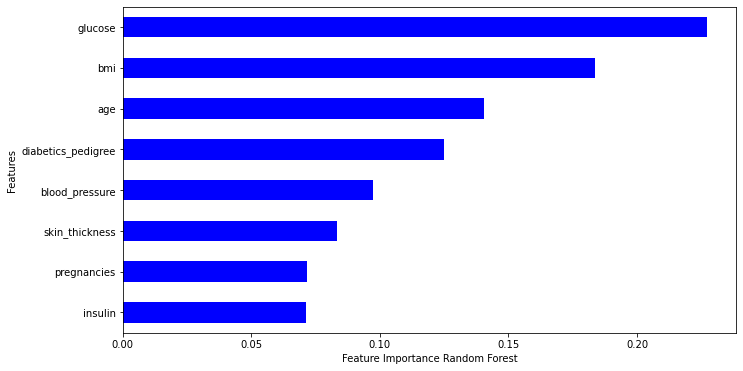

In [ ]:
features_Rf = pd.DataFrame()
features_Rf['Features'] = labels
features_Rf['importance'] = importance_RF
features_Rf.sort_values(by=['importance'], ascending=True, inplace=True)
features_Rf['positive'] = features_Rf['importance'] > 0
features_Rf.set_index('Features', inplace=True)
features_Rf.importance.plot(kind='barh', figsize=(11, 6),color = features_Rf.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Feature Importance Random Forest')

#**Hyper-parameter Tuning (RandomSearch CV)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in range(100,1500,150)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(2,20,2)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6,8,10,14,16,18,20,22,24]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_sm)

{'n_estimators': [100, 250, 400, 550, 700, 850, 1000, 1150, 1300, 1450], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18], 'min_samples_leaf': [2, 4, 6, 8, 10, 14, 16, 18, 20, 22, 24], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 14,
                                                             16, 18, 20, 22,
                                                             24],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18],
                                        'n_estimators': [100, 250, 400, 550,
                                                         700, 850, 1000, 1150,
   

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 1000}

In [ ]:
RF = RandomForestClassifier(n_estimators=1000,min_samples_split=6,min_samples_leaf=2,max_features='auto',max_depth=100,bootstrap=False)
RF.fit(X_train,y_sm.values.ravel())
y_pred = RF.predict(X_test)
RF_score =  metrics.accuracy_score(y_pred, y_test)
RF_score

0.8095238095238095

In [ ]:
RF_cv = cross_val_score(estimator=RF , X=X_train, y=y_sm.values.ravel(), cv=k_fold)
RF_cv

array([0.84507042, 0.83098592, 0.81690141, 0.74647887, 0.85915493,
       0.84507042, 0.8028169 , 0.8028169 , 0.8       , 0.77142857])

In [ ]:
RF_cv.mean()

0.8120724346076459